In [1]:
# Import all required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv(r'Downloads/Python/Titanic/train.csv') # read the Train.csv for Titanic Data set

In [109]:
titanic.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,FareBand,AgeGroup
0,0,3,0,1,0,1,0,1,1,4
1,1,1,1,1,0,2,1,3,4,6


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Titanic Dataset has 891 observations.

In [5]:
(titanic.isnull().sum()/891)*100 # Check for the Null Values % among the dataset

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Age has 19.8 % data missing whereas Cabin has 77% data missing. Embarked has about 0.22% data missing.
To populate the Age Data, we can look for Age mean across the Pclass.
Cabin has majority of data missing , so we can ignore or drop this column from data set
Embarked , we can populate based on most suitable choice.

In [6]:
titanic.groupby('Pclass')['Age'].mean()# checking for mean of Age based on Pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [7]:
# Function to populate the Age based on Mean of Age in each Pclass
def Age_Fill(df):
    Age = df[0]
    Pclass = df[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass ==2:
            return 29.878
        else:
            return 25.14
    else:
        return Age

In [8]:
titanic['Age'] = titanic[['Age','Pclass']].apply(Age_Fill,axis=1)# filling Null Values for Age

In [9]:
titanic.isnull().sum()# all Null Values for Age are resolved.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#titanic.drop('Cabin',axis=1,inplace=True) #  Cabin has mostly Null Values so can drop the Column 

In [10]:
titanic.isnull().sum()# Cabin is Dropped and only Embarked Column has 2 Null Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
titanic.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

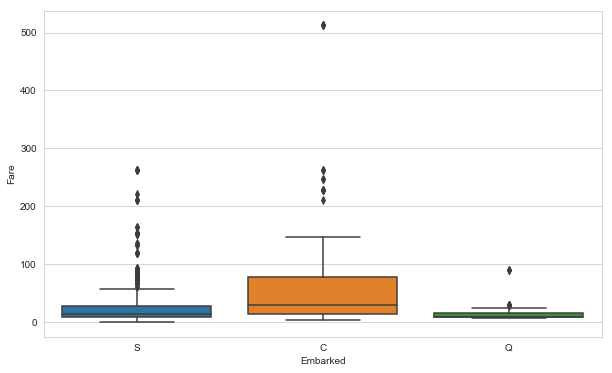

In [13]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.boxplot(data=titanic,x='Embarked',y='Fare')

In [14]:
titanic.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [15]:
titanic.groupby('Embarked')['Fare'].median()

Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64

Since in Pclass = 1, majority of people have boarded from port 'S', so will update the missing info as 'S'

In [16]:
titanic.loc[titanic['Embarked'].isnull(),'Embarked'] = 'S'

In [17]:
titanic.isnull().sum()# All Null Values are resolved now

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

All the Missing values are taken care of.
will try to get some understanding through data visualization

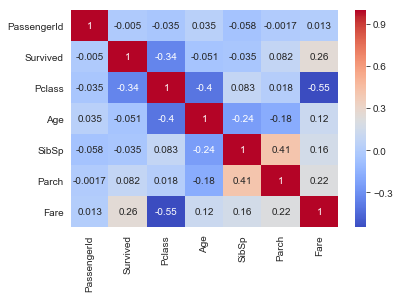

In [18]:
sns.heatmap(titanic.corr(),annot=True,cmap='coolwarm')

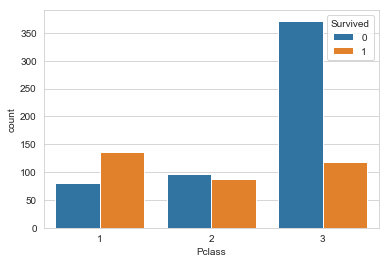

In [19]:
sns.countplot(data=titanic,x='Pclass',hue='Survived')

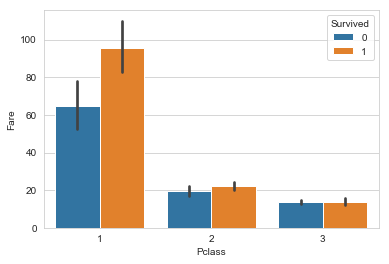

In [20]:
sns.barplot(data=titanic,y='Fare',x='Pclass',hue='Survived')

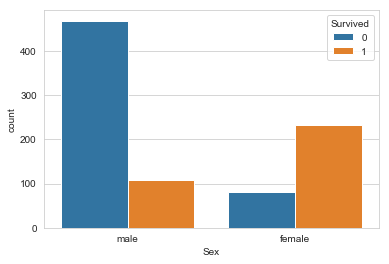

In [21]:
sns.countplot(data=titanic,x='Sex',hue='Survived')

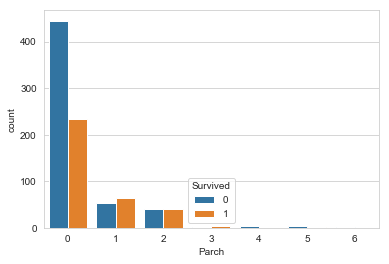

In [22]:
sns.countplot(data=titanic,x='Parch',hue='Survived')

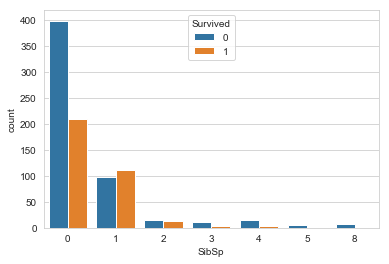

In [23]:
sns.countplot(data=titanic,x='SibSp',hue='Survived')

As per this Data visualization,
people in Pclass =1 had better chance of survival.
Female had better chance of survival better than male.
people travelling alone had better chance of survival.

In [24]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Converting All non Numeric columns into Numeric,
CabinBool is derived from Cabin -> it gives 0,1 based on if Cabin Info is available or not.. since Having Cabin info may indicate of higher class.
Title is indication of various Titles fetched from the Name column and then converted to numeric
Sex is coded as 0 for male and 1 for female
Embarked as S=1,C=2,Q=3
FareBand is derived from converting the Fare into 4 Bands
AgeGroup is derived from dividing age into 7 Age groups.

In [28]:
titanic["CabinBool"] = (titanic["Cabin"].notnull().astype('int'))

In [29]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


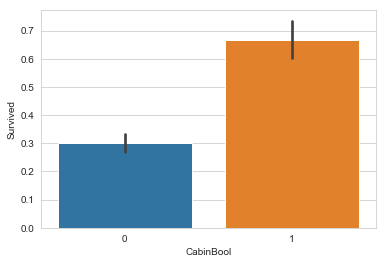

In [30]:
sns.barplot(data=titanic,x='CabinBool',y='Survived')

In [34]:
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)


In [35]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs


In [36]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Countess      1
Lady          1
Don           1
Name: Title, dtype: int64

In [38]:
titanic['Title'] = titanic['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Other')
    
titanic['Title'] = titanic['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.285714
5,Royal,1.000000


In [40]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Other": 6}

titanic['Title'] = titanic['Title'].map(title_mapping)


titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [41]:
sex_mapping = {"male": 0, "female": 1}
titanic['Sex'] = titanic['Sex'].map(sex_mapping)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1


In [42]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
titanic['Embarked'] = titanic['Embarked'].map(embarked_mapping)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,0,1


In [44]:
titanic['FareBand'] = pd.qcut(titanic['Fare'], 4, labels = [1, 2, 3, 4])
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,1,3,4


In [48]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic['AgeGroup'] = pd.cut(titanic["Age"], bins, labels = labels)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,Title,FareBand,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,1,3,4,Adult


In [50]:
age_mapping = {"Baby": 1, "Child": 2, "Teenager": 3, "Student": 4, "Young Adult": 5, "Adult": 6, "Senior": 7}
titanic['AgeGroup'] = titanic['AgeGroup'].map(age_mapping)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool,Title,FareBand,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,1,3,4,6


In [53]:
titanic.drop(['Ticket','Age','Fare','Cabin','Name'],inplace=True,axis=1) 
#titanic.drop(['Name'],inplace=True,axis=1) 

In [54]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,FareBand,AgeGroup
0,1,0,3,0,1,0,1,0,1,1,4
1,2,1,1,1,1,0,2,1,3,4,6
2,3,1,3,1,0,0,1,0,2,2,5
3,4,1,1,1,1,0,1,1,3,4,5
4,5,0,3,0,0,0,1,0,1,2,5


In [ ]:
#sex= pd.get_dummies(titanic['Sex'],drop_first=True)# creating Dummy Variable for Sex Categorical Variable
#embark = pd.get_dummies(titanic['Embarked']) # creating Dummy Variable for Embarked Categorical Variable
#pclass = pd.get_dummies(titanic['Pclass']) # creating Dummy Variable for Pclass Categorical Variable
#titanic = pd.concat([titanic,sex,embark,pclass],axis=1) # Merging the Dummy Variables in Titanic Data Set.

In [55]:
titanic.drop(['PassengerId'],axis=1,inplace=True) # Dropping Passenger Id as well as it just like an Index Numbering.

In [56]:
titanic.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,FareBand,AgeGroup
0,0,3,0,1,0,1,0,1,1,4
1,1,1,1,1,0,2,1,3,4,6


Applying Train Test Split on the Data and using Various Models to see which is predicting best in terms of Accoracy Score.

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']
# Keeping on Survived Column in y_train and all other Features in X_train

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression
logModel = LogisticRegression()
logModel.fit(X_train,y_train) # Fitting the Model on Training Data
pred = logModel.predict(X_test)
acc_log = round(accuracy_score(y_test, pred) * 100, 2)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Logistic Regression Model')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred))
print('Accuracy Score of Logistic Regression Model')
print(acc_log)

Logistic Regression Model


Confusion Matrix
[[135  19]
 [ 35  79]]


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.81      0.69      0.75       114

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

Accuracy Score of Logistic Regression Model
79.85


In [97]:
from sklearn.ensemble import RandomForestClassifier # Importing Logistic Regression
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) # Fitting the Model on Training Data
pred_rfc = rfc.predict(X_test)
acc_rfc = round(accuracy_score(y_test,pred_rfc) * 100, 2)

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [98]:
print('Random Forest Classifier')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred_rfc))
print('Accuracy Score of Random Forest Classifier')
print(acc_rfc)

Random Forest Classifier


Confusion Matrix
[[132  22]
 [ 32  82]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.79      0.72      0.75       114

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Accuracy Score of Random Forest Classifier
79.85


In [99]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train) # Fitting the Model on Training Data
pred_svc = svc.predict(X_test)
acc_svc = round(accuracy_score(y_test,pred_svc) * 100, 2)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [100]:
print('SVM')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred_svc))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred_svc))
print('Accuracy Score of Random Forest Classifier')
print(acc_svc)

SVM


Confusion Matrix
[[137  17]
 [ 34  80]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.82      0.70      0.76       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy Score of Random Forest Classifier
80.97


In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.1,1,10,100,1000], "gamma": [1,0.1,0.01,.001,.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6328502415458938, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8365384615384616, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7980769230769231, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7681159420289855, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[CV] ..... C=1000, gamma=0.01, score=0.8317307692307693, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.7836538461538461, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.7971014492753623, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8461538461538461, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8461538461538461, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.7971014492753623, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.8173076923076923, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.0s finished


{'C': 10, 'gamma': 0.01}

In [102]:
pred_grid = grid.predict(X_test)
acc_grid = round(accuracy_score(y_test,pred_grid) * 100, 2)

In [103]:
print('GRID Search')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred_grid))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred_grid))
print('Accuracy Score of Random Forest Classifier')
print(acc_grid)

GRID Search


Confusion Matrix
[[137  17]
 [ 34  80]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.82      0.70      0.76       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy Score of Random Forest Classifier
80.97


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbk = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_test,pred_gbk) * 100, 2)

In [105]:
print('Gradient Boosting')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred_gbk))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred_gbk))
print('Accuracy Score of Random Forest Classifier')
print(acc_gbk)

Gradient Boosting


Confusion Matrix
[[137  17]
 [ 35  79]]


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       154
           1       0.82      0.69      0.75       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Accuracy Score of Random Forest Classifier
80.6


In [108]:
Model_Prediction = pd.DataFrame({"Model":['Logistic Regression','Random Forest Classifier','SVM','SVM-GridSearch','Gradient Boosting'],
                                "Accuracy_Score":[acc_log,acc_rfc,acc_svc,acc_grid,acc_gbk]})
Model_Prediction.sort_values(by='Accuracy_Score',ascending=False)


,Model,Accuracy_Score
2,SVM,80.97
3,SVM-GridSearch,80.97
4,Gradient Boosting,80.60
0,Logistic Regression,79.85
1,Random Forest Classifier,79.85


In [74]:
titanic_test = pd.read_csv(r'Downloads/Python/Titanic/test.csv') # Importing the Test Data to create Test Data Set

In [75]:
titanic_test.head()# Checking the Head of Titanic Test Data Set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
titanic_test.isnull().sum()# Checking the Null Values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [77]:
titanic_test.groupby('Pclass')['Age'].mean() # Checking the Mean age for each Pclass

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [78]:
#Function to fill Null Values in Age for each Pclass
def Impute_Age(df):
    Age = df[0]
    Pclass = df[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 40.92
        elif Pclass ==2:
            return 28.78
        else:
            return 24.03
    else:
        return Age

In [79]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(Impute_Age,axis=1)# Populating Null Values of Age

In [80]:
titanic_test.isnull().sum()# Checking the Reaming Null Values. Age is Fixed now.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic_test.head() # Checking head of Titanic_test Data Set

In [ ]:
#PassengerId = titanic_test['PassengerId'] # Getting the Passenger Id

In [ ]:
# Checking the mean of Fare for Pclass to be able to populate the missing Value of Fare appropriately
titanic_test.groupby('Pclass')['Fare'].mean()

In [ ]:
titanic_test[titanic_test['Fare'].isnull()] # checking the record where Fare is NaN

In [ ]:
titanic_test.plot.scatter('Pclass','Fare')

In [ ]:
# Checking the Head of Titanic Test Data Set sorted by Ticket to see any possibility of 
# identifying the right Fare based on ticket.
titanic_test[titanic_test['Pclass'] == 3].sort_values('Ticket').head(10) 

In [ ]:
#populating the Nan Fare as Mean of Pclass == 3, since it belongs to pClass = 3
titanic_test.loc[titanic_test['Fare'].isnull(),'Fare'] = titanic_test[titanic_test['Pclass']== 3]['Fare'].mean()

In [ ]:
titanic_test[titanic_test['Pclass']== 3]['Fare'].mean()

In [ ]:
titanic_test[titanic_test['Ticket']=='3701']# Populated the the Missing value for Fare

In [ ]:
titanic_test.isnull().sum()# Checking the Null Values

In [ ]:
titanic_test.drop('Cabin',axis=1,inplace=True)# Dropping Cabin from Data Set since its most of the Values are Null

In [ ]:
titanic_test.head()

In [ ]:
sex_test = pd.get_dummies(titanic_test['Sex'],drop_first=True)# creating Dummy Variable for Sex Categorical Variable

In [ ]:
embark_test=pd.get_dummies(titanic_test['Embarked'])# creating Dummy Variable for Embarked Categorical Variable

In [ ]:
pclass_test = pd.get_dummies(titanic_test['Pclass'])# creating Dummy Variable for Pclass Categorical Variable

In [ ]:
# Conactenating the dummy Variables to Test Data Set
titanic_test = pd.concat([titanic_test,sex_test,embark_test,pclass_test],axis=1)

In [ ]:
titanic_test.head()# Checking the Head of Test Data Set after Merge.

In [ ]:
titanic_test.drop(['Sex','Embarked','Ticket','Name','Pclass'],axis=1,inplace=True)# Dropping Categorical Columns

In [ ]:
titanic_test.head()

In [ ]:
X_test = titanic_test.drop(['PassengerId'],axis=1)# Creating X_test.
#y_test = titanic_test['Survived']


In [ ]:
Predictions = logModel.predict(X_test)# Predicting on X_test
Predictions

In [ ]:
# Putting the Predictions and PassengerId in the Output Csv
data1 = pd.Series(Predictions)
data2 = pd.concat([PassengerId,data1],axis=1)
data2.columns = ['PassengerId','Survived']
data2.set_index('PassengerId',inplace=True)
data2.to_csv('Downloads/Python/Titanic/Titanic_Predictions.csv')